## Imports

In [47]:
# import problems
import sys

sys.path.append("C:\Python311\Lib\site-packages")

In [48]:
%load_ext lab_black
import pandas as pd
import warnings
import ast
import json
import numpy as np
from IPython.display import JSON

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pivottablejs import pivot_ui
import sweetviz as sv

from yellowbrick.classifier import ConfusionMatrix
from scipy import stats
from scipy.stats import shapiro

from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    mean_squared_error,
    confusion_matrix,
    classification_report,
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import (
    OneHotEncoder,
    LabelEncoder,
    MinMaxScaler,
    StandardScaler,
)
from sklearn.feature_selection import RFECV

warnings.filterwarnings("ignore")

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [6]:
df = pd.read_csv("world_cup_2022_catar.csv")
df.shape

(64, 25)

In [6]:
df.head(1)

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,duels_won_home,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win,prediction_quantity,location,events_list,lineup_home,lineup_away
0,Final,18/12/2022,True,4,2,Argentina,France,3,3,54%,...,40%,60%,64%,3%,33%,1002332,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[{'player_name': ' Di María ', 'player_number'...","[{'player_name': ' Giroud ', 'player_number': ..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   stage                     64 non-null     object
 1   date                      64 non-null     object
 2   pens                      64 non-null     bool  
 3   pens_home_score           64 non-null     object
 4   pens_away_score           64 non-null     object
 5   team_name_home            64 non-null     object
 6   team_name_away            64 non-null     object
 7   team_home_score           64 non-null     int64 
 8   team_away_score           64 non-null     int64 
 9   possession_home           64 non-null     object
 10  possession_away           64 non-null     object
 11  total_shots_home          64 non-null     int64 
 12  total_shots_away          64 non-null     int64 
 13  shots_on_target_home      64 non-null     int64 
 14  shots_on_target_away      64

In [8]:
df.describe()

,team_home_score,team_away_score,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,prediction_quantity
count,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,6.400000e+01
mean,1.578125,1.109375,11.296875,11.453125,4.312500,3.765625,4.036118e+05
std,1.551289,1.055856,5.088673,5.866043,2.617857,2.729860,2.001993e+05
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.304210e+05
25%,0.000000,0.000000,8.000000,7.750000,3.000000,2.000000,2.321788e+05
50%,1.000000,1.000000,10.500000,10.500000,4.000000,3.000000,3.639255e+05
75%,2.000000,2.000000,14.000000,14.000000,6.000000,5.000000,5.351200e+05
max,7.000000,4.000000,26.000000,32.000000,10.000000,12.000000,1.002332e+06


In [9]:
df.columns

Index(['stage', 'date', 'pens', 'pens_home_score', 'pens_away_score',
       'team_name_home', 'team_name_away', 'team_home_score',
       'team_away_score', 'possession_home', 'possession_away',
       'total_shots_home', 'total_shots_away', 'shots_on_target_home',
       'shots_on_target_away', 'duels_won_home', 'duels_won_away',
       'prediction_team_home_win', 'prediction_draw',
       'prediction_team_away_win', 'prediction_quantity', 'location',
       'events_list', 'lineup_home', 'lineup_away'],
      dtype='object')

## EDA (SweetViz)

In [163]:
my_report = sv.analyze(df)
my_report.show_html()

Done! Use 'show' commands to display/save.   |██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Correlation Matrix

<AxesSubplot: >

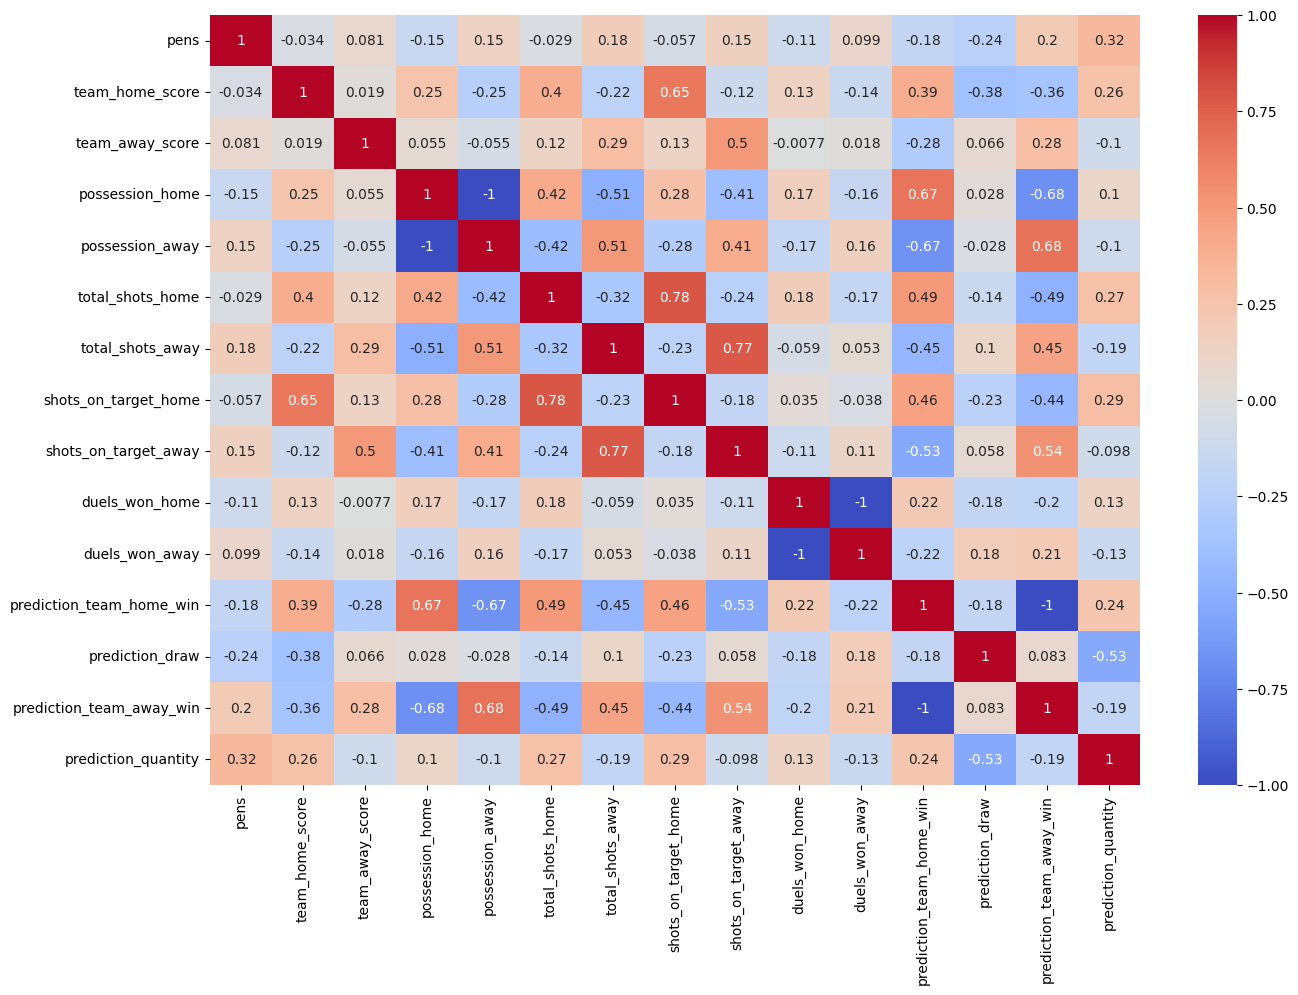

In [45]:
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

## Feature Engineering

### Changing porcentage dtype to be used later (Data transformation)

In [7]:
# check values
columns = [
    "possession_home",
    "possession_away",
    "duels_won_home",
    "duels_won_away",
    "prediction_team_home_win",
    "prediction_draw",
    "prediction_team_away_win",
]
df[columns]

,possession_home,possession_away,duels_won_home,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win
0,54%,46%,40%,60%,64%,3%,33%
1,51%,49%,53%,47%,42%,4%,54%
2,38%,62%,58%,42%,58%,3%,39%
3,39%,61%,43%,57%,71%,4%,25%
4,58%,42%,55%,45%,40%,5%,55%
...,...,...,...,...,...,...,...
59,70%,30%,64%,36%,94%,2%,4%
60,59%,41%,47%,54%,51%,9%,40%
61,46%,54%,54%,47%,22%,7%,71%
62,79%,21%,60%,40%,92%,2%,6%


In [8]:
def clean_percentage_columns(df, columns_list):
    for column in columns_list:
        df[column] = df[column].astype(str)
        df[column] = df[column].str.replace("%", "")
        df[column] = df[column].astype(float)
        df[column] = df[column] / 100
    return df

In [9]:
clean_percentage_columns(df, columns)
df[columns]

,possession_home,possession_away,duels_won_home,duels_won_away,prediction_team_home_win,prediction_draw,prediction_team_away_win
0,0.54,0.46,0.40,0.60,0.64,0.03,0.33
1,0.51,0.49,0.53,0.47,0.42,0.04,0.54
2,0.38,0.62,0.58,0.42,0.58,0.03,0.39
3,0.39,0.61,0.43,0.57,0.71,0.04,0.25
4,0.58,0.42,0.55,0.45,0.40,0.05,0.55
...,...,...,...,...,...,...,...
59,0.70,0.30,0.64,0.36,0.94,0.02,0.04
60,0.59,0.41,0.47,0.54,0.51,0.09,0.40
61,0.46,0.54,0.54,0.47,0.22,0.07,0.71
62,0.79,0.21,0.60,0.40,0.92,0.02,0.06


### Manipulating events_list, lineup_home and lineup_away columns into new columns

#### lineup_home manipulation

In [10]:
# pre process to be able to manipulate the column
df["lineup_home"] = df["lineup_home"].str.replace("'", '"')
df["lineup_home"] = df["lineup_home"].apply(json.loads)

# transforming lineup_home list of dictionaries into new columns: player_names_home and player_numbers_home
def extract_player_data(lineup):
    if not lineup or not isinstance(lineup, list):
        return None, None
    player_names = [
        player["player_name"] for player in lineup if isinstance(player, dict)
    ]
    player_numbers = [
        player["player_number"] for player in lineup if isinstance(player, dict)
    ]
    if len(player_names) != len(player_numbers):
        print(lineup)
        return None, None
    return (player_names, player_numbers)


df["player_names_home"] = df.apply(
    lambda row: extract_player_data(row["lineup_home"])[0], axis=1
)
df["player_numbers_home"] = df.apply(
    lambda row: extract_player_data(row["lineup_home"])[1], axis=1
)

"""
removing the spacing from all values, like:
{'player_name': ' Mitrović ', 'player_number': ' 9'} -> {'player_name': 'Mitrović', 'player_number': '9'}
"""
df["player_names_home"] = df["player_names_home"].apply(
    lambda x: list(map(str.strip, x))
)
df["player_numbers_home"] = df["player_numbers_home"].apply(
    lambda x: list(map(str.strip, x))
)
df.drop("lineup_home", axis=1, inplace=True)

#### lineup_away manipulation

In [11]:
df["lineup_away"] = df["lineup_away"].str.replace("'", '"')
df["lineup_away"] = df["lineup_away"].apply(json.loads)

# transforming lineup_away list of dictionaries into new columns: player_names_away and player_numbers_away
def extract_player_data(lineup):

    if not lineup or not isinstance(lineup, list):
        return None, None
    player_names = [
        player["player_name"] for player in lineup if isinstance(player, dict)
    ]
    player_numbers = [
        player["player_number"] for player in lineup if isinstance(player, dict)
    ]
    if len(player_names) != len(player_numbers):
        print(lineup)
        return None, None
    return (player_names, player_numbers)


df["player_names_away"] = df.apply(
    lambda row: extract_player_data(row["lineup_away"])[0], axis=1
)
df["player_numbers_away"] = df.apply(
    lambda row: extract_player_data(row["lineup_away"])[1], axis=1
)

"""
removing the spacing from all values, like:
{'player_name': ' Perišić ', 'player_number': ' 4'} -> {'player_name': 'Perišić', 'player_number': '4'}
"""
df["player_names_away"] = df["player_names_away"].apply(
    lambda x: list(map(str.strip, x))
)
df["player_numbers_away"] = df["player_numbers_away"].apply(
    lambda x: list(map(str.strip, x))
)

df.drop("lineup_away", axis=1, inplace=True)

#### events_list manipulation

In [12]:
df["match_id"] = 0
cont = 0
for i, row in df.iterrows():
    cont = cont + 1
    df.loc[i, "match_id"] = cont

In [13]:
df

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,prediction_draw,prediction_team_away_win,prediction_quantity,location,events_list,player_names_home,player_numbers_home,player_names_away,player_numbers_away,match_id
0,Final,18/12/2022,True,4,2,Argentina,France,3,3,0.54,...,0.03,0.33,1002332,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 23' "",...","[Di María, Álvarez, Messi, Mac Allister, Ferná...","[11, 9, 10, 20, 24, 7, 3, 19, 13, 26, 23]","[Giroud, Mbappé, Griezmann, Dembélé, Rabiot, T...","[9, 10, 7, 11, 14, 8, 22, 18, 4, 5, 1]",1
1,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,0.51,...,0.04,0.54,367156,Khalifa International Stadium,"[{'event_team': 'home', 'event_time': "" 7' "", ...","[Livaja, Oršić, Kramarić, Majer, Kovačić, Modr...","[14, 18, 9, 7, 8, 10, 4, 20, 24, 2, 1]","[Boufal, En-Nesyri, Ziyech, Sabiri, Amrabat, E...","[17, 19, 7, 11, 4, 23, 25, 20, 18, 2, 1]",2
2,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,0.38,...,0.03,0.39,720768,Al Bayt Stadium,"[{'event_team': 'home', 'event_time': "" 5' "", ...","[Giroud, Mbappé, Griezmann, Dembélé, Fofana, T...","[9, 10, 7, 11, 13, 8, 22, 24, 4, 5, 1]","[En-Nesyri, Boufal, Amrabat, Ounahi, Ziyech, M...","[19, 17, 4, 8, 7, 3, 18, 6, 20, 2, 1]",3
3,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,0.39,...,0.04,0.25,792326,Lusail Iconic Stadium,"[{'event_team': 'away', 'event_time': "" 32' "",...","[Álvarez, Messi, Mac Allister, Fernández, Pare...","[9, 10, 20, 24, 5, 7, 3, 19, 13, 26, 23]","[Perišić, Kramarić, Pašalić, Kovačić, Brozović...","[4, 9, 15, 8, 11, 10, 19, 20, 6, 22, 1]",4
4,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,0.58,...,0.05,0.55,672577,Al Bayt Stadium,"[{'event_team': 'away', 'event_time': "" 17' "",...","[Foden, Kane, Saka, Bellingham, Rice, Henderso...","[20, 9, 17, 22, 4, 8, 3, 6, 5, 2, 1]","[Giroud, Mbappé, Griezmann, Dembélé, Rabiot, T...","[9, 10, 7, 11, 14, 8, 22, 18, 4, 5, 1]",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Group stage: Matchday 1,22/11/2022,False,False,False,Argentina,Saudi Arabia,1,2,0.70,...,0.02,0.04,657383,Lusail Iconic Stadium,"[{'event_team': 'home', 'event_time': "" 10' "",...","[Martínez, Messi, Gómez, Paredes, De Paul, Di ...","[22, 10, 17, 5, 7, 11, 3, 19, 13, 26, 23]","[Al-Shehri, Al-Dawsari, Kanno, Al-Faraj, Al-Bu...","[11, 10, 23, 7, 9, 8, 13, 5, 17, 12, 21]",60
60,Group stage: Matchday 1,21/11/2022,False,False,False,USA,Wales,1,1,0.59,...,0.09,0.40,361145,Ahmad bin Ali Stadium,"[{'event_team': 'home', 'event_time': "" 11' "",...","[Pulisic, Sargent, Weah, Musah, Adams, McKenni...","[10, 24, 21, 6, 4, 8, 5, 13, 3, 2, 1]","[James, Bale, Williams, Wilson, Ampadu, Ramsey...","[20, 11, 3, 8, 15, 10, 14, 4, 6, 5, 1]",61
61,Group stage: Matchday 1,21/11/2022,False,False,False,Senegal,Netherlands,0,2,0.46,...,0.07,0.71,457977,Al Thumama Stadium,"[{'event_team': 'away', 'event_time': "" 56' "",...","[Dia, Sarr, Gueye, Diatta, Mendy, Kouyaté, Dia...","[9, 18, 5, 15, 6, 8, 22, 4, 3, 21, 16]","[Bergwijn, Janssen, Gakpo, Blind, De Jong, Ber...","[7, 18, 8, 17, 21, 11, 22, 5, 4, 3, 23]",62
62,Group stage: Matchday 1,21/11/2022,False,False,False,England,Iran,6,2,0.79,...,0.02,0.06,498752,Khalifa International Stadium,"[{'event_team': 'away', 'event_time': "" 20' "",...","[Kane, Sterling, Mount, Saka, Rice, Bellingham...","[9, 10, 19, 17, 4, 22, 3, 6, 5, 12, 1]","[Taremi, Hajsafi, Karimi, Nourollahi, Jahanbak...","[9, 3, 18, 21, 7, 5, 19, 15, 8, 2, 1]",63


In [14]:
"""
getting the values from "events_list" columns and transforming to another dataframe.

note:
we can check before that the keys from the dict events_list are: 
"event_team","event_time","event_type","action_player_1","action_player_2",

so we can add "team" column into to the new events_list dataset to have a identifier for them.
"""

df_events_list = pd.DataFrame(
    columns=[
        "team",
        "event_team",
        "event_time",
        "event_type",
        "action_player_1",
        "action_player_2",
    ]
)

for i, row in df.iterrows():
    events_list = ast.literal_eval(row["events_list"])
    for event in events_list:
        if event.get("event_team") == "home":
            team = row.team_name_home
        else:
            team = row.team_name_away
        df_events_list = df_events_list.append(
            {
                "team": team,
                "event_team": event.get("event_team"),
                "event_time": event.get("event_time"),
                "event_type": event.get("event_type"),
                "action_player_1": event.get("action_player_1"),
                "action_player_2": event.get("action_player_2"),
                "match_id": int(row["match_id"]),
            },
            ignore_index=True,
        )

# add indexes: event_id and match_id
df_events_list["event_id"] = 0

cont = 0
for i, row in df_events_list.iterrows():
    cont = cont + 1
    df_events_list.loc[i, "event_id"] = cont

df_events_list = df_events_list[
    [
        "event_id",
        "match_id",
        "team",
        "event_team",
        "event_time",
        "event_type",
        "action_player_1",
        "action_player_2",
    ]
]

# drop events_list from df
df.drop("events_list", axis=1, inplace=True)

In [15]:
df_events_list

,event_id,match_id,team,event_team,event_time,event_type,action_player_1,action_player_2
0,1,1.0,Argentina,home,23',Penalty,Lionel Messi,Penalty
1,2,1.0,Argentina,home,36',Goal,Ángel Di María,Alexis Mac Allister
2,3,1.0,France,away,41',Substitution,Randal Kolo Muani,Ousmane Dembélé
3,4,1.0,France,away,41',Substitution,Marcus Thuram,Olivier Giroud
4,5,1.0,Argentina,home,52',Yellow card,Enzo Fernández,None
...,...,...,...,...,...,...,...,...
1038,1039,64.0,Qatar,home,72',Substitution,Mohammed Muntari,Almoez Ali
1039,1040,64.0,Ecuador,away,77',Substitution,José Cifuentes,Enner Valencia
1040,1041,64.0,Qatar,home,78',Yellow card,Akram Afif,None
1041,1042,64.0,Ecuador,away,90',Substitution,Kevin Rodríguez,Michael Estrada


In [16]:
# df_events_list.to_csv("datasets/df_events_list.csv", index=False)

### Creating "who_won" and "team_who_won" columns

In [17]:
for index, row in df.iterrows():
    if row.pens == True:
        if row.pens_home_score > row.pens_away_score:
            df.loc[index, "who_won"] = "team_home_won"
        else:
            df.loc[index, "who_won"] = "team_away_won"
    else:
        if row.team_home_score > row.team_away_score:
            df.loc[index, "who_won"] = "team_home_won"
        elif row.team_home_score < row.team_away_score:
            df.loc[index, "who_won"] = "team_away_won"
        else:
            df.loc[index, "who_won"] = "Draw"
df

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,prediction_draw,prediction_team_away_win,prediction_quantity,location,player_names_home,player_numbers_home,player_names_away,player_numbers_away,match_id,who_won
0,Final,18/12/2022,True,4,2,Argentina,France,3,3,0.54,...,0.03,0.33,1002332,Lusail Iconic Stadium,"[Di María, Álvarez, Messi, Mac Allister, Ferná...","[11, 9, 10, 20, 24, 7, 3, 19, 13, 26, 23]","[Giroud, Mbappé, Griezmann, Dembélé, Rabiot, T...","[9, 10, 7, 11, 14, 8, 22, 18, 4, 5, 1]",1,team_home_won
1,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,0.51,...,0.04,0.54,367156,Khalifa International Stadium,"[Livaja, Oršić, Kramarić, Majer, Kovačić, Modr...","[14, 18, 9, 7, 8, 10, 4, 20, 24, 2, 1]","[Boufal, En-Nesyri, Ziyech, Sabiri, Amrabat, E...","[17, 19, 7, 11, 4, 23, 25, 20, 18, 2, 1]",2,team_home_won
2,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,0.38,...,0.03,0.39,720768,Al Bayt Stadium,"[Giroud, Mbappé, Griezmann, Dembélé, Fofana, T...","[9, 10, 7, 11, 13, 8, 22, 24, 4, 5, 1]","[En-Nesyri, Boufal, Amrabat, Ounahi, Ziyech, M...","[19, 17, 4, 8, 7, 3, 18, 6, 20, 2, 1]",3,team_home_won
3,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,0.39,...,0.04,0.25,792326,Lusail Iconic Stadium,"[Álvarez, Messi, Mac Allister, Fernández, Pare...","[9, 10, 20, 24, 5, 7, 3, 19, 13, 26, 23]","[Perišić, Kramarić, Pašalić, Kovačić, Brozović...","[4, 9, 15, 8, 11, 10, 19, 20, 6, 22, 1]",4,team_home_won
4,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,0.58,...,0.05,0.55,672577,Al Bayt Stadium,"[Foden, Kane, Saka, Bellingham, Rice, Henderso...","[20, 9, 17, 22, 4, 8, 3, 6, 5, 2, 1]","[Giroud, Mbappé, Griezmann, Dembélé, Rabiot, T...","[9, 10, 7, 11, 14, 8, 22, 18, 4, 5, 1]",5,team_away_won
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Group stage: Matchday 1,22/11/2022,False,False,False,Argentina,Saudi Arabia,1,2,0.70,...,0.02,0.04,657383,Lusail Iconic Stadium,"[Martínez, Messi, Gómez, Paredes, De Paul, Di ...","[22, 10, 17, 5, 7, 11, 3, 19, 13, 26, 23]","[Al-Shehri, Al-Dawsari, Kanno, Al-Faraj, Al-Bu...","[11, 10, 23, 7, 9, 8, 13, 5, 17, 12, 21]",60,team_away_won
60,Group stage: Matchday 1,21/11/2022,False,False,False,USA,Wales,1,1,0.59,...,0.09,0.40,361145,Ahmad bin Ali Stadium,"[Pulisic, Sargent, Weah, Musah, Adams, McKenni...","[10, 24, 21, 6, 4, 8, 5, 13, 3, 2, 1]","[James, Bale, Williams, Wilson, Ampadu, Ramsey...","[20, 11, 3, 8, 15, 10, 14, 4, 6, 5, 1]",61,Draw
61,Group stage: Matchday 1,21/11/2022,False,False,False,Senegal,Netherlands,0,2,0.46,...,0.07,0.71,457977,Al Thumama Stadium,"[Dia, Sarr, Gueye, Diatta, Mendy, Kouyaté, Dia...","[9, 18, 5, 15, 6, 8, 22, 4, 3, 21, 16]","[Bergwijn, Janssen, Gakpo, Blind, De Jong, Ber...","[7, 18, 8, 17, 21, 11, 22, 5, 4, 3, 23]",62,team_away_won
62,Group stage: Matchday 1,21/11/2022,False,False,False,England,Iran,6,2,0.79,...,0.02,0.06,498752,Khalifa International Stadium,"[Kane, Sterling, Mount, Saka, Rice, Bellingham...","[9, 10, 19, 17, 4, 22, 3, 6, 5, 12, 1]","[Taremi, Hajsafi, Karimi, Nourollahi, Jahanbak...","[9, 3, 18, 21, 7, 5, 19, 15, 8, 2, 1]",63,team_home_won


In [18]:
for index, row in df.iterrows():
    if row.pens == True:
        if row.pens_home_score > row.pens_away_score:
            df.loc[index, "team_who_won"] = df.loc[index, "team_name_home"]
        else:
            df.loc[index, "team_who_won"] = df.loc[index, "team_name_away"]
    else:
        if row.team_home_score > row.team_away_score:
            df.loc[index, "team_who_won"] = df.loc[index, "team_name_home"]
        elif row.team_home_score < row.team_away_score:
            df.loc[index, "team_who_won"] = df.loc[index, "team_name_away"]
        else:
            df.loc[index, "team_who_won"] = "Draw"
df

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,prediction_team_away_win,prediction_quantity,location,player_names_home,player_numbers_home,player_names_away,player_numbers_away,match_id,who_won,team_who_won
0,Final,18/12/2022,True,4,2,Argentina,France,3,3,0.54,...,0.33,1002332,Lusail Iconic Stadium,"[Di María, Álvarez, Messi, Mac Allister, Ferná...","[11, 9, 10, 20, 24, 7, 3, 19, 13, 26, 23]","[Giroud, Mbappé, Griezmann, Dembélé, Rabiot, T...","[9, 10, 7, 11, 14, 8, 22, 18, 4, 5, 1]",1,team_home_won,Argentina
1,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,2,1,0.51,...,0.54,367156,Khalifa International Stadium,"[Livaja, Oršić, Kramarić, Majer, Kovačić, Modr...","[14, 18, 9, 7, 8, 10, 4, 20, 24, 2, 1]","[Boufal, En-Nesyri, Ziyech, Sabiri, Amrabat, E...","[17, 19, 7, 11, 4, 23, 25, 20, 18, 2, 1]",2,team_home_won,Croatia
2,Semi-finals,14/12/2022,False,False,False,France,Morocco,2,0,0.38,...,0.39,720768,Al Bayt Stadium,"[Giroud, Mbappé, Griezmann, Dembélé, Fofana, T...","[9, 10, 7, 11, 13, 8, 22, 24, 4, 5, 1]","[En-Nesyri, Boufal, Amrabat, Ounahi, Ziyech, M...","[19, 17, 4, 8, 7, 3, 18, 6, 20, 2, 1]",3,team_home_won,France
3,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,3,0,0.39,...,0.25,792326,Lusail Iconic Stadium,"[Álvarez, Messi, Mac Allister, Fernández, Pare...","[9, 10, 20, 24, 5, 7, 3, 19, 13, 26, 23]","[Perišić, Kramarić, Pašalić, Kovačić, Brozović...","[4, 9, 15, 8, 11, 10, 19, 20, 6, 22, 1]",4,team_home_won,Argentina
4,Quarter-finals,10/12/2022,False,False,False,England,France,1,2,0.58,...,0.55,672577,Al Bayt Stadium,"[Foden, Kane, Saka, Bellingham, Rice, Henderso...","[20, 9, 17, 22, 4, 8, 3, 6, 5, 2, 1]","[Giroud, Mbappé, Griezmann, Dembélé, Rabiot, T...","[9, 10, 7, 11, 14, 8, 22, 18, 4, 5, 1]",5,team_away_won,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Group stage: Matchday 1,22/11/2022,False,False,False,Argentina,Saudi Arabia,1,2,0.70,...,0.04,657383,Lusail Iconic Stadium,"[Martínez, Messi, Gómez, Paredes, De Paul, Di ...","[22, 10, 17, 5, 7, 11, 3, 19, 13, 26, 23]","[Al-Shehri, Al-Dawsari, Kanno, Al-Faraj, Al-Bu...","[11, 10, 23, 7, 9, 8, 13, 5, 17, 12, 21]",60,team_away_won,Saudi Arabia
60,Group stage: Matchday 1,21/11/2022,False,False,False,USA,Wales,1,1,0.59,...,0.40,361145,Ahmad bin Ali Stadium,"[Pulisic, Sargent, Weah, Musah, Adams, McKenni...","[10, 24, 21, 6, 4, 8, 5, 13, 3, 2, 1]","[James, Bale, Williams, Wilson, Ampadu, Ramsey...","[20, 11, 3, 8, 15, 10, 14, 4, 6, 5, 1]",61,Draw,Draw
61,Group stage: Matchday 1,21/11/2022,False,False,False,Senegal,Netherlands,0,2,0.46,...,0.71,457977,Al Thumama Stadium,"[Dia, Sarr, Gueye, Diatta, Mendy, Kouyaté, Dia...","[9, 18, 5, 15, 6, 8, 22, 4, 3, 21, 16]","[Bergwijn, Janssen, Gakpo, Blind, De Jong, Ber...","[7, 18, 8, 17, 21, 11, 22, 5, 4, 3, 23]",62,team_away_won,Netherlands
62,Group stage: Matchday 1,21/11/2022,False,False,False,England,Iran,6,2,0.79,...,0.06,498752,Khalifa International Stadium,"[Kane, Sterling, Mount, Saka, Rice, Bellingham...","[9, 10, 19, 17, 4, 22, 3, 6, 5, 12, 1]","[Taremi, Hajsafi, Karimi, Nourollahi, Jahanbak...","[9, 3, 18, 21, 7, 5, 19, 15, 8, 2, 1]",63,team_home_won,England


## Creating some statistics

In [356]:
df_global_statistics = (
    df_events_list.event_type.value_counts()
    .to_frame()
    .reset_index()
    .rename({"index": "event_type", "event_type": "total"}, axis=1)
)
# df_global_statistics.to_csv("datasets/df_global_statistics.csv", index=False)
df_global_statistics

,event_type,total
0,Substitution,587
1,Yellow card,224
2,Goal,153
3,PK,41
4,Penalty,17
5,Disallowed goal,9
6,Missed penalty,6
7,Second yellow card,3
8,Own goal,2
9,Red card,1


In [339]:
df_events_list.event_type.value_counts()

Substitution          587
Yellow card           224
Goal                  153
PK                     41
Penalty                17
Disallowed goal         9
Missed penalty          6
Second yellow card      3
Own goal                2
Red card                1
Name: event_type, dtype: int64

In [36]:
df_players_all_goals = df_events_list[
    (df_events_list.event_type == "Goal")
    | (df_events_list.event_type == "Penalty")
    | (df_events_list.event_type == "Own goal")
]
# df_players_goals.to_csv("datasets/df_players_goals.csv", index=False)
df_players_all_goals

,event_id,match_id,team,event_team,event_time,event_type,action_player_1,action_player_2
0,1,1.0,Argentina,home,23',Penalty,Lionel Messi,Penalty
1,2,1.0,Argentina,home,36',Goal,Ángel Di María,Alexis Mac Allister
9,10,1.0,France,away,80',Penalty,Kylian Mbappé,Penalty
10,11,1.0,France,away,81',Goal,Kylian Mbappé,Marcus Thuram
18,19,1.0,Argentina,home,108',Goal,Lionel Messi,None
...,...,...,...,...,...,...,...,...
1023,1024,63.0,England,home,71',Goal,Marcus Rashford,Harry Kane
1026,1027,63.0,England,home,90',Goal,Jack Grealish,Callum Wilson
1027,1028,63.0,Iran,away,103',Penalty,Mehdi Taremi,Penalty
1030,1031,64.0,Ecuador,away,16',Penalty,Enner Valencia,Penalty


In [38]:
df_teams_goals = (
    df_players_all_goals.team.value_counts()
    .to_frame()
    .reset_index()
    .rename({"index": "team", "team": "total_goals"}, axis=1)
)
df_teams_goals.head()

,team,total_goals
0,France,16
1,Argentina,15
2,England,13
3,Portugal,12
4,Netherlands,10


In [39]:
# df_teams_goals.to_csv("datasets/goals_per_team.csv", index=False)

In [41]:
# top scorer

top_scores = (
    df_players_all_goals.action_player_1.value_counts()
    .to_frame()
    .reset_index()
    .rename({"index": "player_name", "action_player_1": "total_goals"}, axis=1)
)
top_scores.head()

,player_name,total_goals
0,Kylian Mbappé,8
1,Lionel Messi,7
2,Julián Álvarez,4
3,Olivier Giroud,4
4,Richarlison,3


In [42]:
# top_scores.to_csv("datasets/top_scores.csv", index=False)

In [43]:
# top assists
top_assists = (
    df_players_goals.action_player_2.value_counts()
    .to_frame()
    .reset_index()
    .rename({"index": "player_name", "action_player_2": "total_assists"}, axis=1)
    .drop(index=0)
    .reset_index(drop=True)
)
top_assists

,player_name,total_assists
0,Harry Kane,3
1,Ivan Perišić,3
2,Lionel Messi,3
3,Antoine Griezmann,3
4,Bruno Fernandes,3
...,...,...
89,David Raum,1
90,Kaoru Mitoma,1
91,Junya Ito,1
92,César Azpilicueta,1


In [32]:
# top_assists.to_csv("datasets/top_assists.csv", index=False)

In [44]:
df_participation = pd.concat([top_scores, top_assists], axis=1)
df_participation

,player_name,total_goals,player_name,total_assists
0,Kylian Mbappé,8,Harry Kane,3.0
1,Lionel Messi,7,Ivan Perišić,3.0
2,Julián Álvarez,4,Lionel Messi,3.0
3,Olivier Giroud,4,Antoine Griezmann,3.0
4,Richarlison,3,Bruno Fernandes,3.0
...,...,...,...,...
113,Ao Tanaka,1,NaN,NaN
114,Hwang Hee-chan,1,NaN,NaN
115,Kim Young-gwon,1,NaN,NaN
116,Ricardo Horta,1,NaN,NaN


In [45]:
df_participation = top_scores.merge(top_assists, how="outer", on="player_name").fillna(
    0
)
df_participation["total_participations"] = (
    df_participation["total_goals"] + df_participation["total_assists"]
)
df_participation = df_participation.sort_values(
    "total_participations", ascending=False
).reset_index(drop=True)
df_participation

,player_name,total_goals,total_assists,total_participations
0,Kylian Mbappé,8.0,2.0,10.0
1,Lionel Messi,7.0,3.0,10.0
2,Harry Kane,2.0,3.0,5.0
3,Bruno Fernandes,2.0,3.0,5.0
4,Olivier Giroud,4.0,0.0,4.0
...,...,...,...,...
168,Manuel Akanji,1.0,0.0,1.0
169,Casemiro,1.0,0.0,1.0
170,Cristiano Ronaldo,1.0,0.0,1.0
171,Boulaye Dia,1.0,0.0,1.0


In [35]:
# df_participation.to_csv("datasets/top_participations.csv", index=False)

#### Visualizing Plots

df_global_statistics, df_participation, top_assists, df_players_all_goals, df_teams_goals, top_scores

## Statistic for each team

In [357]:
df.columns

Index(['stage', 'date', 'pens', 'pens_home_score', 'pens_away_score',
       'team_name_home', 'team_name_away', 'team_home_score',
       'team_away_score', 'possession_home', 'possession_away',
       'total_shots_home', 'total_shots_away', 'shots_on_target_home',
       'shots_on_target_away', 'duels_won_home', 'duels_won_away',
       'prediction_team_home_win', 'prediction_draw',
       'prediction_team_away_win', 'prediction_quantity', 'location',
       'player_names_home', 'player_numbers_home', 'player_names_away',
       'player_numbers_away', 'match_id', 'who_won', 'team_who_won'],
      dtype='object')

In [358]:
set(df.team_name_away.unique()) - set(df.team_name_home.unique())

set()

In [359]:
team_list = sorted(df.team_name_home.unique())

In [366]:
final_aux = pd.DataFrame(
    {"score": 0, "possession": 0, "total_shots": 0, "team": "NaN"}, index=[0]
)
for team in team_list:

    aux_home = (
        df[df.team_name_home == team][
            [
                "team_name_home",
                "team_home_score",
                "possession_home",
                "total_shots_home",
                "shots_on_target_home",
                "duels_won_home",
            ]
        ]
        .mean()
        .to_frame()
        .T
    )
    aux_home["team"] = "Argentina"
    aux_home.rename(
        {
            "team_home_score": "score",
            "possession_home": "possession",
            "total_shots_home": "total_shots",
            "shots_on_target_home": "shots_on_target",
            "duels_won_home": "duels_won",
        },
        axis=1,
        inplace=True,
    )
    aux_away = (
        df[df.team_name_away == team][
            [
                "team_name_away",
                "team_away_score",
                "possession_away",
                "total_shots_away",
                "shots_on_target_away",
                "duels_won_away",
            ]
        ]
        .mean()
        .to_frame()
        .T
    )
    aux_away["team"] = "Argentina"
    aux_away.rename(
        {
            "team_away_score": "score",
            "possession_away": "possession",
            "total_shots_away": "total_shots",
            "shots_on_target_away": "shots_on_target",
            "duels_won_away": "duels_won",
        },
        axis=1,
        inplace=True,
    )
    aux_concat = pd.concat([aux_home, aux_away]).mean().to_frame().T
    aux_concat["team"] = team
    statistic_per_team = pd.concat([statistic_per_team, aux_concat], ignore_index=True)


statistic_per_team.drop(index=df.index[0], inplace=True)
statistic_per_team = statistic_per_team[
    [
        "team",
        "score",
        "possession",
        "total_shots",
        "shots_on_target",
        "duels_won",
    ]
]
statistic_per_team["score"] = round(statistic_per_team["score"], 3)
statistic_per_team["possession"] = round(statistic_per_team["possession"], 3)
statistic_per_team["total_shots"] = round(statistic_per_team["total_shots"], 3)
statistic_per_team["shots_on_target"] = round(statistic_per_team["shots_on_target"], 3)
statistic_per_team["duels_won"] = round(statistic_per_team["duels_won"], 3)

In [367]:
statistic_per_team

,team,score,possession,total_shots,shots_on_target,duels_won
1,Argentina,2.100,0.588,15.550,7.250,0.522
2,Australia,1.000,0.350,7.000,2.667,0.490
3,Belgium,0.250,0.562,12.750,3.000,0.545
4,Brazil,1.417,0.563,19.500,8.333,0.482
5,Cameroon,1.000,0.432,9.000,5.250,0.522
6,Canada,0.750,0.540,10.000,1.250,0.492
7,Costa Rica,1.250,0.308,5.000,3.250,0.555
8,Croatia,1.042,0.556,11.292,3.708,0.513
9,Denmark,0.250,0.612,11.250,3.750,0.448
10,Ecuador,1.250,0.555,9.750,3.750,0.462


In [368]:
# statistic_per_team.to_csv("datasets/statistic_per_team.csv", index=False)

## Ball possession versus victory

In [47]:
columns = [
    "pens",
    "pens_home_score",
    "pens_away_score",
    "team_name_home",
    "team_name_away",
    "team_home_score",
    "team_away_score",
    "possession_home",
    "possession_away",
    "who_won",
    "team_who_won",
]
df_ball_possession = df[columns]
df_ball_possession

,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,possession_away,who_won,team_who_won
0,True,4,2,Argentina,France,1.39,1.39,0.54,0.46,team_home_won,Argentina
1,False,False,False,Croatia,Morocco,1.10,0.69,0.51,0.49,team_home_won,Croatia
2,False,False,False,France,Morocco,1.10,0.00,0.38,0.62,team_home_won,France
3,False,False,False,Argentina,Croatia,1.39,0.00,0.39,0.61,team_home_won,Argentina
4,False,False,False,England,France,0.69,1.10,0.58,0.42,team_away_won,France
...,...,...,...,...,...,...,...,...,...,...,...
59,False,False,False,Argentina,Saudi Arabia,0.69,1.10,0.70,0.30,team_away_won,Saudi Arabia
60,False,False,False,USA,Wales,0.69,0.69,0.59,0.41,Draw,Draw
61,False,False,False,Senegal,Netherlands,0.00,1.10,0.46,0.54,team_away_won,Netherlands
62,False,False,False,England,Iran,1.95,1.10,0.79,0.21,team_home_won,England


In [48]:
for index, row in df_ball_possession.iterrows():
    if row.team_who_won != "Draw":
        if (row.possession_home > row.possession_away) & (
            row.team_name_home == row.team_who_won
        ):
            df_ball_possession.loc[index, "ball_possession_analysis"] = "Y"
        elif (row.possession_away > row.possession_home) & (
            row.team_name_away == row.team_who_won
        ):
            df_ball_possession.loc[index, "ball_possession_analysis"] = "Y"
        else:
            df_ball_possession.loc[index, "ball_possession_analysis"] = "N"
    else:
        df_ball_possession.loc[index, "ball_possession_analysis"] = "Draw"

In [49]:
df_ball_possession.ball_possession_analysis.value_counts()

Y       27
N       27
Draw    10
Name: ball_possession_analysis, dtype: int64

In [23]:
# df_ball_possession.to_csv("datasets/ball_possession.csv", index=False)

### Compare "who_won" with predictions columns

In [64]:
for index, row in df.iterrows():
    if (row.prediction_team_home_win < 0.5) and (row.prediction_team_away_win < 0.5):
        df.loc[index, "prediction"] = "Draw"
    else:
        if row.prediction_team_home_win > row.prediction_team_away_win:
            df.loc[index, "prediction"] = "home_win"
        elif row.prediction_team_away_win > row.prediction_team_home_win:
            df.loc[index, "prediction"] = "away_win"
        elif (row.prediction_draw > row.prediction_team_home_win) or (
            row.prediction_draw > row.prediction_team_away_win
        ):
            df.loc[index, "prediction"] = "Draw"

In [69]:
for index, row in df.iterrows():
    if row.prediction == "Draw":
        if (row.prediction_team_home_win > row.prediction_team_away_win) and (
            row.team_who_won == row.team_name_home
        ):
            df.loc[index, "upset_case"] = False
        elif (row.prediction_team_away_win > row.prediction_team_home_win) and (
            row.team_who_won == row.team_name_away
        ):
            df.loc[index, "upset_case"] = False
        elif row.team_who_won == "Draw":
            df.loc[index, "upset_case"] = False
        else:
            df.loc[index, "upset_case"] = True
    else:
        if (row.prediction == "home_win") and (row.team_who_won != row.team_name_home):
            df.loc[index, "upset_case"] = True
        elif (row.prediction == "away_win") and (
            row.team_who_won != row.team_name_away
        ):
            df.loc[index, "upset_case"] = True
        else:
            df.loc[index, "upset_case"] = False

In [71]:
df_predictions = df[
    [
        "team_name_home",
        "team_name_away",
        "prediction_team_home_win",
        "prediction_draw",
        "prediction_team_away_win",
        "prediction",
        "team_who_won",
        "who_won",
        "upset_case",
    ]
]
df_predictions[df_predictions.upset_case == True]

,team_name_home,team_name_away,prediction_team_home_win,prediction_draw,prediction_team_away_win,prediction,team_who_won,who_won,upset_case
1,Croatia,Morocco,0.42,0.04,0.54,away_win,Croatia,team_home_won,True
5,Morocco,Portugal,0.33,0.03,0.64,away_win,Morocco,team_home_won,True
7,Croatia,Brazil,0.11,0.03,0.86,away_win,Croatia,team_home_won,True
9,Morocco,Spain,0.34,0.03,0.63,away_win,Morocco,team_home_won,True
11,Japan,Croatia,0.56,0.04,0.40,home_win,Croatia,team_away_won,True
17,Cameroon,Brazil,0.06,0.02,0.92,away_win,Cameroon,team_home_won,True
19,South Korea,Portugal,0.11,0.03,0.86,away_win,South Korea,team_home_won,True
20,Japan,Spain,0.13,0.03,0.84,away_win,Japan,team_home_won,True
26,Tunisia,France,0.11,0.03,0.86,away_win,Tunisia,team_home_won,True
27,Australia,Denmark,0.25,0.08,0.67,away_win,Australia,team_home_won,True


In [75]:
"""
df_predictions[df_predictions.upset_case == True].to_csv(
    "datasets/upset_cases.csv", index=False
)
"""

### Identify which players have the biggest impact on matches

In [119]:
lineup = []
for i in range(len(df)):
    for player in df["player_names_home"][i]:
        lineup.append([df["team_name_home"][i], df["date"][i], player])
    for player in df["player_names_away"][i]:
        lineup.append([df["team_name_away"][i], df["date"][i], player])

lineup_count = pd.DataFrame(lineup, columns=["team", "date", "player"])
lineup_count = lineup_count.drop_duplicates()
lineup_count = (
    lineup_count.groupby(["team", "player"]).size().reset_index(name="counts")
)

In [125]:
lineup_count[lineup_count.player == "Álvarez"]

,team,player,counts
15,Argentina,Álvarez,5
275,Mexico,Álvarez,3


In [129]:
winners = df[df["team_home_score"] > df["team_away_score"]][
    ["team_name_home", "player_names_home"]
]
winners = pd.concat(
    [
        winners,
        df[df["team_away_score"] > df["team_home_score"]][
            ["team_name_away", "player_names_away"]
        ],
    ]
)
winners_count = (
    winners.explode("player_names_home")
    .groupby(["team_name_home", "player_names_home"])["player_names_home"]
    .count()
    .reset_index(name="wins")
)
winners_count.rename(
    columns={"team_name_home": "team", "player_names_home": "player"}, inplace=True
)

lineup_count = lineup_count.merge(winners_count, on=["team", "player"], how="left")
lineup_count["wins"].fillna(0, inplace=True)
lineup_count["win_percentage"] = lineup_count["wins"] / lineup_count["counts"]

In [89]:
lineup_count

,team,player,counts,wins,win_percentage
0,Argentina,Acuña,4,2.0,0.500000
1,Argentina,De Paul,7,3.0,0.428571
2,Argentina,Di María,4,1.0,0.250000
3,Argentina,Fernández,5,2.0,0.400000
4,Argentina,Gómez,2,1.0,0.500000
...,...,...,...,...,...
505,Wales,Roberts,2,0.0,0.000000
506,Wales,Rodon,3,0.0,0.000000
507,Wales,Ward,1,0.0,0.000000
508,Wales,Williams,3,0.0,0.000000


In [90]:
top_players = (
    lineup_count[lineup_count.counts > 2]
    .sort_values(by="win_percentage", ascending=False)
    .head(10)
)
top_players

,team,player,counts,wins,win_percentage
329,Portugal,Dias,4,3.0,0.75
57,Brazil,Marquinhos,4,3.0,0.75
56,Brazil,Lucas Paquetá,4,3.0,0.75
61,Brazil,Richarlison,4,3.0,0.75
65,Brazil,Vinícius Júnior,4,3.0,0.75
49,Brazil,Casemiro,4,3.0,0.75
331,Portugal,Félix,4,3.0,0.75
330,Portugal,Fernandes,4,3.0,0.75
60,Brazil,Raphinha,4,3.0,0.75
46,Brazil,Alisson,4,3.0,0.75


#### Charts about it

In [132]:
lineup_count.sort_values("counts", ascending=False)

,team,player,counts,wins,win_percentage
278,Morocco,Amrabat,7,1.0,0.142857
117,Croatia,Gvardiol,7,2.0,0.285714
1,Argentina,De Paul,7,3.0,0.428571
122,Croatia,Livaković,7,2.0,0.285714
120,Croatia,Kramarić,7,2.0,0.285714
...,...,...,...,...,...
172,England,Rashford,1,0.0,0.000000
396,Serbia,Mladenović,1,0.0,0.000000
161,Ecuador,Porozo,1,0.0,0.000000
400,Serbia,Vlahović,1,0.0,0.000000


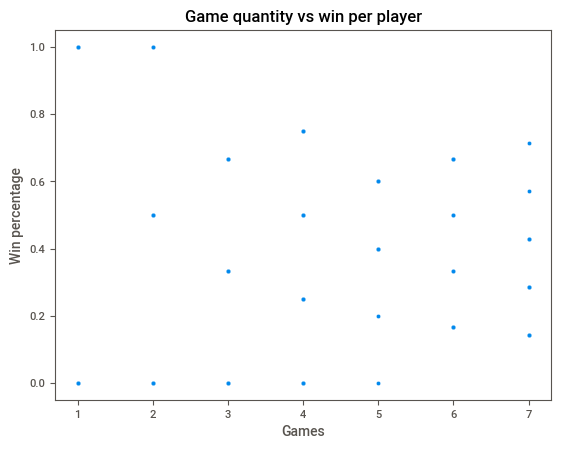

In [167]:
sns.scatterplot(x="counts", y="win_percentage", data=lineup_count)
plt.xlabel("Games")
plt.ylabel("Win percentage")
plt.title("Game quantity vs win per player")
plt.show()

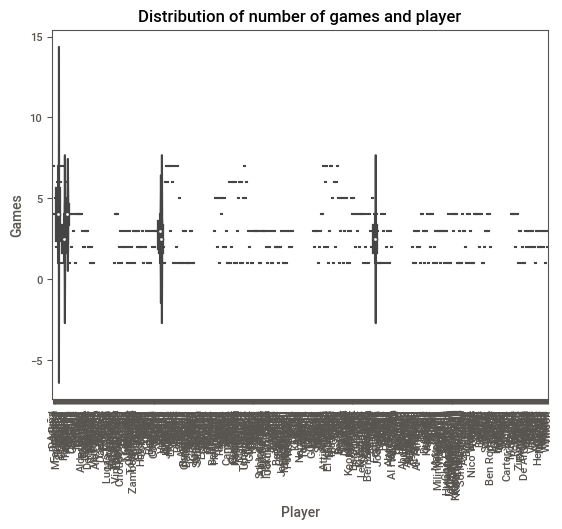

In [166]:
sns.violinplot(x="player", y="counts", data=lineup_count)
plt.xlabel("Player")
plt.ylabel("Games")
plt.title("Distribution of number of games and player")
plt.xticks(rotation=90)
plt.show()

### Relationship between the number of goals scored and the number of shots on goal

In [43]:
df.columns

Index(['stage', 'date', 'pens', 'pens_home_score', 'pens_away_score',
       'team_name_home', 'team_name_away', 'team_home_score',
       'team_away_score', 'possession_home', 'possession_away',
       'total_shots_home', 'total_shots_away', 'shots_on_target_home',
       'shots_on_target_away', 'duels_won_home', 'duels_won_away',
       'prediction_team_home_win', 'prediction_draw',
       'prediction_team_away_win', 'prediction_quantity', 'location',
       'player_names_home', 'player_numbers_home', 'player_names_away',
       'player_numbers_away', 'who_won', 'prediction', 'upset_case'],
      dtype='object')

In [133]:
columns = [
    "team_name_home",
    "team_name_away",
    "team_home_score",
    "team_away_score",
    "total_shots_home",
    "total_shots_away",
    "shots_on_target_home",
    "shots_on_target_away",
]
df_efetive_goals = df[columns]
df_efetive_goals

,team_name_home,team_name_away,team_home_score,team_away_score,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away
0,Argentina,France,1.39,1.39,3.04,2.40,2.40,1.79
1,Croatia,Morocco,1.10,0.69,2.56,2.30,1.61,1.10
2,France,Morocco,1.10,0.00,2.71,2.64,1.39,1.39
3,Argentina,Croatia,1.39,0.00,2.30,2.56,2.08,1.10
4,England,France,0.69,1.10,2.83,2.20,2.20,1.79
...,...,...,...,...,...,...,...,...
59,Argentina,Saudi Arabia,0.69,1.10,2.77,1.39,1.95,1.10
60,USA,Wales,0.69,0.69,1.95,2.08,0.69,1.39
61,Senegal,Netherlands,0.00,1.10,2.77,2.40,1.61,1.39
62,England,Iran,1.95,1.10,2.64,2.20,2.08,1.39


In [134]:
for index, row in df_efetive_goals.iterrows():
    if row.shots_on_target_home != 0:
        df_efetive_goals.loc[
            index, "percentage_goals_per_shots_on_target_home"
        ] = round((row.team_home_score / row.shots_on_target_home), 3)
    else:
        df_efetive_goals.loc[index, "percentage_goals_per_shots_on_target_home"] = 0
    if row.shots_on_target_away != 0:
        df_efetive_goals.loc[
            index, "percentage_goals_per_shots_on_target_away"
        ] = round((row.team_away_score / row.shots_on_target_away), 3)
    else:
        df_efetive_goals.loc[index, "percentage_goals_per_shots_on_target_away"] = 0

In [135]:
grouped_df_efetive_goals = df_efetive_goals.groupby("team_name_home")
mean_df_home = (
    grouped_df_efetive_goals["percentage_goals_per_shots_on_target_home"]
    .mean()
    .reset_index()
)
mean_df_home = mean_df_home.rename(columns={"team_name_home": "team"})
mean_df_home

,team,percentage_goals_per_shots_on_target_home
0,Argentina,0.643200
1,Australia,0.429000
2,Belgium,0.248000
3,Brazil,0.521000
4,Cameroon,0.564000
5,Canada,0.000000
6,Costa Rica,0.564000
7,Croatia,0.588500
8,Denmark,0.000000
9,Ecuador,0.429000


In [136]:
grouped_df_efetive_goals = df_efetive_goals.groupby("team_name_away")
mean_df_away = (
    grouped_df_efetive_goals["percentage_goals_per_shots_on_target_away"]
    .mean()
    .reset_index()
)
mean_df_away = mean_df_away.rename(columns={"team_name_away": "team"})
mean_df_away

,team,percentage_goals_per_shots_on_target_away
0,Argentina,0.522500
1,Australia,0.875667
2,Belgium,0.000000
3,Brazil,0.139000
4,Cameroon,0.000000
5,Canada,0.313500
6,Costa Rica,0.500000
7,Croatia,0.143000
8,Denmark,0.313500
9,Ecuador,0.610000


In [140]:
df_percentage_goals_per_shots_on_target = mean_df_home.merge(mean_df_away)
df_percentage_goals_per_shots_on_target["mean_percentage_goals_per_shots_on_target"] = (
    df_percentage_goals_per_shots_on_target.percentage_goals_per_shots_on_target_away
    + df_percentage_goals_per_shots_on_target.percentage_goals_per_shots_on_target_home
) / 2

df_percentage_goals_per_shots_on_target = df_percentage_goals_per_shots_on_target.sort_values(
    "mean_percentage_goals_per_shots_on_target", ascending=False
).reset_index(drop=True)
df_percentage_goals_per_shots_on_target

,team,percentage_goals_per_shots_on_target_home,percentage_goals_per_shots_on_target_away,mean_percentage_goals_per_shots_on_target
0,Netherlands,0.849000,0.791000,0.820000
1,Australia,0.429000,0.875667,0.652333
2,USA,1.000000,0.233000,0.616500
3,England,0.528750,0.668000,0.598375
4,Argentina,0.643200,0.522500,0.582850
5,France,0.681500,0.464000,0.572750
6,Saudi Arabia,0.627000,0.500000,0.563500
7,Japan,0.406667,0.683000,0.544833
8,Serbia,0.683000,0.388500,0.535750
9,Costa Rica,0.564000,0.500000,0.532000


In [141]:
"""
df_percentage_goals_per_shots_on_target.to_csv(
    "datasets/df_percentage_goals_per_shots_on_target.csv", index=False
)
"""

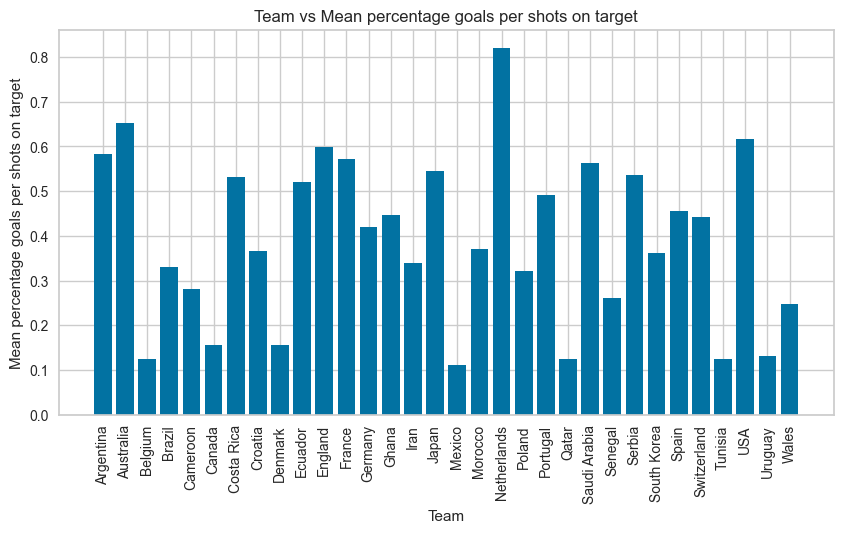

In [142]:
plt.figure(figsize=(10, 5))
plt.bar(
    df_percentage_goals_per_shots_on_target["team"],
    df_percentage_goals_per_shots_on_target[
        "mean_percentage_goals_per_shots_on_target"
    ],
)
plt.xlabel("Team")
plt.ylabel("Mean percentage goals per shots on target")
plt.title("Team vs Mean percentage goals per shots on target")
plt.xticks(rotation=90)
plt.show()

## Cluster

In [70]:
df_statistic_cluster = pd.read_csv("datasets/statistic_per_team.csv")
print(df_statistic_cluster.shape)
print(df_statistic_cluster.columns)
print(df_statistic_cluster.dtypes)

(32, 6)
Index(['team', 'score', 'possession', 'total_shots', 'shots_on_target',
       'duels_won'],
      dtype='object')
team                object
score              float64
possession         float64
total_shots        float64
shots_on_target    float64
duels_won          float64
dtype: object


In [42]:
"""
le = LabelEncoder()

df_statistic_cluster["team"] = le.fit_transform(df_statistic_cluster["team"])
"""

### K-means

In [107]:
cluster_columns = [
    "score",
    "possession",
    "total_shots",
    "shots_on_target",
    "duels_won",
]

X = df_statistic_cluster[cluster_columns].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_k = -1
best_silhouette_score = -1
best_davies_bouldin_score = float("inf")

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    predictions = kmeans.predict(X_scaled)

    silhouette = silhouette_score(X_scaled, predictions)
    davies_bouldin = davies_bouldin_score(X_scaled, predictions)

    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_k = k

    if davies_bouldin < best_davies_bouldin_score:
        best_davies_bouldin_score = davies_bouldin
        best_k = k

print("Best k: ", best_k)
print("Best silhouette score: ", best_silhouette_score)
print("Best Davies-Bouldin score: ", best_davies_bouldin_score)

Best k:  9
Best silhouette score:  0.445529038492968
Best Davies-Bouldin score:  0.8065944386118375


In [108]:
kmeans = KMeans(n_clusters=best_k)

kmeans.fit(X_scaled)

predictions = kmeans.predict(X_scaled)

df_statistic_cluster["teams_cluster"] = predictions

df_statistic_cluster.sort_values("teams_cluster")

,team,score,possession,total_shots,shots_on_target,duels_won,teams_cluster
0,Argentina,2.100,0.588,15.550,7.250,0.522,0
20,Portugal,2.083,0.622,13.083,5.083,0.537,0
10,England,2.750,0.644,14.625,6.250,0.558,0
11,France,2.208,0.512,13.917,5.292,0.564,0
29,USA,0.833,0.552,9.500,2.833,0.480,1
27,Switzerland,1.167,0.497,8.500,3.167,0.467,1
24,Serbia,1.750,0.522,11.000,3.250,0.508,1
5,Canada,0.750,0.540,10.000,1.250,0.492,1
18,Netherlands,2.000,0.534,9.000,3.125,0.484,1
9,Ecuador,1.250,0.555,9.750,3.750,0.462,1


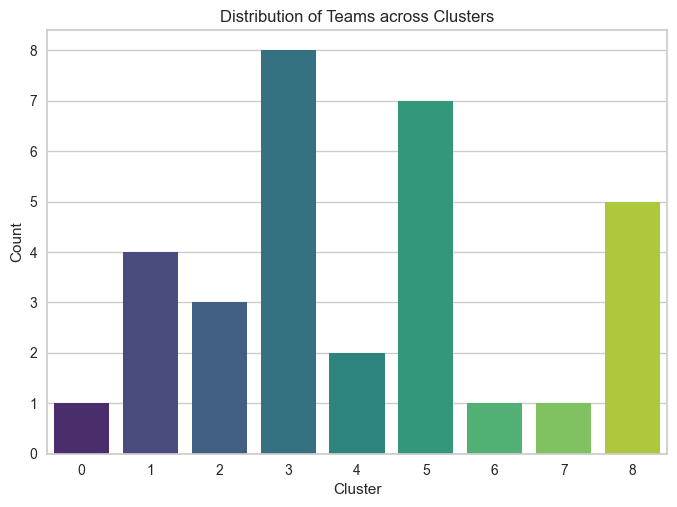

In [74]:
sns.countplot(x="teams_cluster", data=df_statistic_cluster, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Distribution of Teams across Clusters")
plt.show()

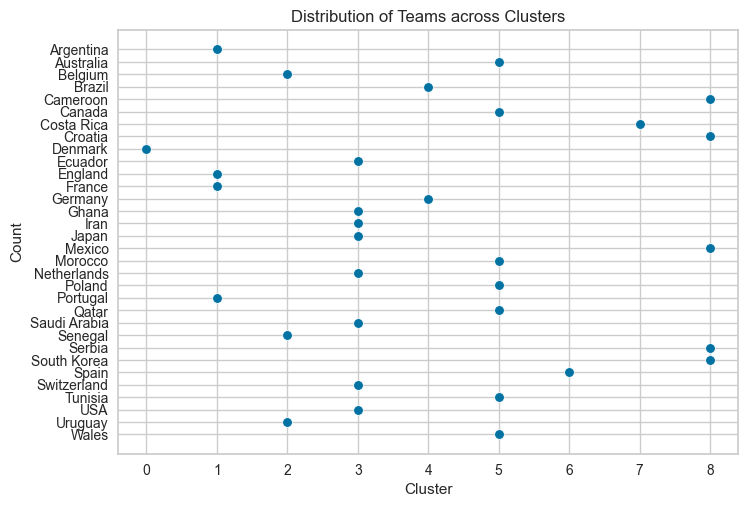

In [75]:
sns.scatterplot(
    x="teams_cluster", y="team", data=df_statistic_cluster, palette="viridis"
)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Distribution of Teams across Clusters")
plt.show()

### DBScan

In [111]:
cluster_columns = [
    "score",
    "possession",
    "total_shots",
    "shots_on_target",
    "duels_won",
]

X = df_statistic_cluster[cluster_columns].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

best_eps = -1
best_min_samples = -1
best_silhouette_score = -1
best_davies_bouldin_score = float("inf")

for eps in np.arange(0.1, 1.0, 0.1):
    for min_samples in range(2, 11):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_scaled)
        predictions = dbscan.labels_

        if len(np.unique(predictions)) < 2:
            continue

        silhouette = silhouette_score(X_scaled, predictions)
        davies_bouldin = davies_bouldin_score(X_scaled, predictions)

        if silhouette > best_silhouette_score:
            best_silhouette_score = silhouette
            best_eps = eps
            best_min_samples = min_samples

        if davies_bouldin < best_davies_bouldin_score:
            best_davies_bouldin_score = davies_bouldin
            best_eps = eps
            best_min_samples = min_samples

print("Best eps: ", best_eps)
print("Best min_samples: ", best_min_samples)
print("Best silhouette score: ", best_silhouette_score)
print("Best Davies-Bouldin score: ", best_davies_bouldin_score)

dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)

dbscan.fit(X_scaled)

predictions = dbscan.labels_

df_statistic_cluster["teams_cluster"] = predictions

df_statistic_cluster.sort_values("teams_cluster")

Best eps:  0.9
Best min_samples:  3
Best silhouette score:  0.059077633884494135
Best Davies-Bouldin score:  1.1069750472855475


,team,score,possession,total_shots,shots_on_target,duels_won,teams_cluster
0,Argentina,2.100,0.588,15.550,7.250,0.522,-1
29,USA,0.833,0.552,9.500,2.833,0.480,-1
28,Tunisia,0.250,0.422,11.250,2.250,0.503,-1
26,Spain,2.250,0.768,12.250,4.250,0.478,-1
25,South Korea,1.250,0.478,12.500,4.750,0.495,-1
24,Serbia,1.750,0.522,11.000,3.250,0.508,-1
23,Senegal,0.833,0.448,13.667,3.500,0.523,-1
21,Qatar,0.250,0.415,6.250,2.250,0.522,-1
20,Portugal,2.083,0.622,13.083,5.083,0.537,-1
18,Netherlands,2.000,0.534,9.000,3.125,0.484,-1


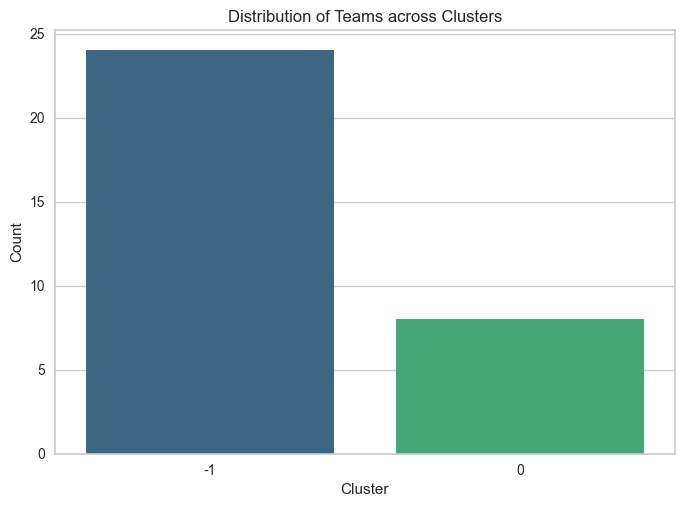

In [112]:
sns.countplot(x="teams_cluster", data=df_statistic_cluster, palette="viridis")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.title("Distribution of Teams across Clusters")
plt.show()

## Predictions of the home team winning, drawing or away team winning

In [495]:
df[
    [
        "team_home_score",
        "team_away_score",
        "possession_home",
        "possession_away",
        "total_shots_home",
        "total_shots_away",
        "shots_on_target_home",
        "shots_on_target_away",
        "duels_won_home",
        "duels_won_away",
        "who_won",
    ]
]

,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,who_won
0,1.39,1.39,0.54,0.46,3.04,2.40,2.40,1.79,0.40,0.60,team_home_won
1,1.10,0.69,0.51,0.49,2.56,2.30,1.61,1.10,0.53,0.47,team_home_won
2,1.10,0.00,0.38,0.62,2.71,2.64,1.39,1.39,0.58,0.42,team_home_won
3,1.39,0.00,0.39,0.61,2.30,2.56,2.08,1.10,0.43,0.57,team_home_won
4,0.69,1.10,0.58,0.42,2.83,2.20,2.20,1.79,0.55,0.45,team_away_won
...,...,...,...,...,...,...,...,...,...,...,...
59,0.69,1.10,0.70,0.30,2.77,1.39,1.95,1.10,0.64,0.36,team_away_won
60,0.69,0.69,0.59,0.41,1.95,2.08,0.69,1.39,0.47,0.54,Draw
61,0.00,1.10,0.46,0.54,2.77,2.40,1.61,1.39,0.54,0.47,team_away_won
62,1.95,1.10,0.79,0.21,2.64,2.20,2.08,1.39,0.60,0.40,team_home_won


### Label Encoder

In [496]:
le = LabelEncoder()

# fit and transform the label encoder on the column "who_won"
df["who_won"] = le.fit_transform(df["who_won"])

### Gaussian Distribution - Log Transformation 

In [333]:
check_columns = [
    "team_home_score",
    "team_away_score",
    "possession_home",
    "possession_away",
    "total_shots_home",
    "total_shots_away",
    "shots_on_target_home",
    "shots_on_target_away",
    "duels_won_home",
    "duels_won_away",
]

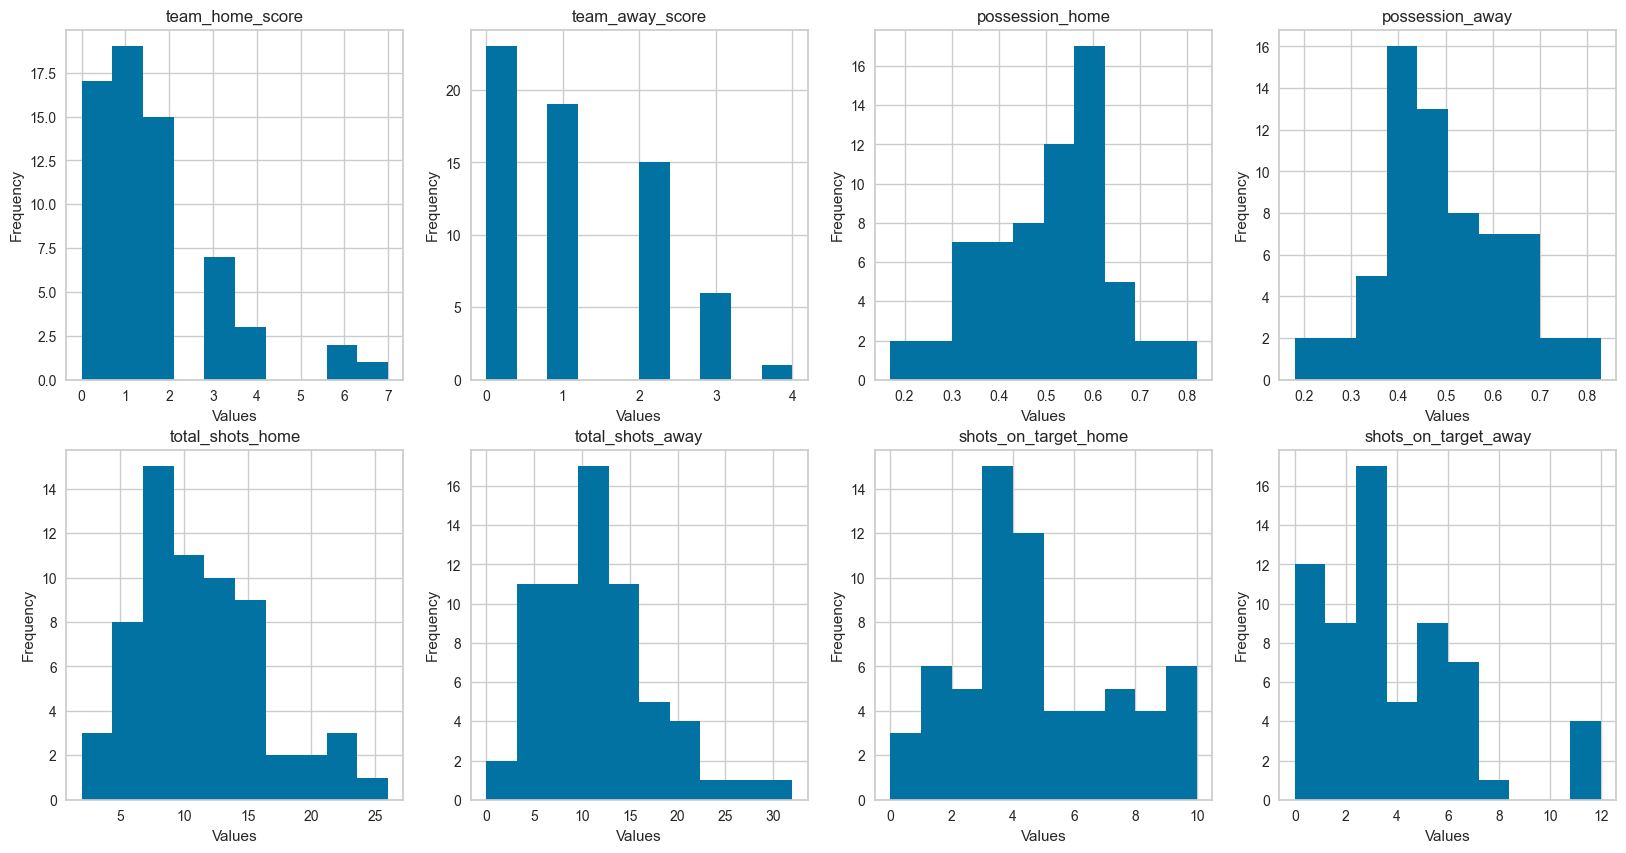

In [334]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for ax, column in zip(axes.flatten(), check_columns):
    ax.hist(df[column])
    ax.set_title(column)
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequency")

In [335]:
# shapiro
alpha = 0.05
for column in check_columns:
    stat, p = shapiro(df[column])
    if p > alpha:
        print(f"{column} looks Gaussian (fail to reject H0)")
    else:
        print(f"{column} does not look Gaussian (reject H0)")

team_home_score does not look Gaussian (reject H0)
team_away_score does not look Gaussian (reject H0)
possession_home looks Gaussian (fail to reject H0)
possession_away looks Gaussian (fail to reject H0)
total_shots_home does not look Gaussian (reject H0)
total_shots_away does not look Gaussian (reject H0)
shots_on_target_home does not look Gaussian (reject H0)
shots_on_target_away does not look Gaussian (reject H0)
duels_won_home looks Gaussian (fail to reject H0)
duels_won_away looks Gaussian (fail to reject H0)


In [336]:
transform_columns = [
    "team_home_score",
    "team_away_score",
    "total_shots_home",
    "total_shots_away",
    "shots_on_target_home",
    "shots_on_target_away",
]
# process to dont get any infinity value
for column in transform_columns:
    df[column] = df[column] + 1

df[transform_columns] = round(np.log(df[transform_columns]), 2)

In [337]:
df

,stage,date,pens,pens_home_score,pens_away_score,team_name_home,team_name_away,team_home_score,team_away_score,possession_home,...,prediction_team_away_win,prediction_quantity,location,player_names_home,player_numbers_home,player_names_away,player_numbers_away,match_id,who_won,team_who_won
0,Final,18/12/2022,True,4,2,Argentina,France,1.39,1.39,0.54,...,0.33,1002332,Lusail Iconic Stadium,"[Di María, Álvarez, Messi, Mac Allister, Ferná...","[11, 9, 10, 20, 24, 7, 3, 19, 13, 26, 23]","[Giroud, Mbappé, Griezmann, Dembélé, Rabiot, T...","[9, 10, 7, 11, 14, 8, 22, 18, 4, 5, 1]",1,team_home_won,Argentina
1,Match for third place,17/12/2022,False,False,False,Croatia,Morocco,1.10,0.69,0.51,...,0.54,367156,Khalifa International Stadium,"[Livaja, Oršić, Kramarić, Majer, Kovačić, Modr...","[14, 18, 9, 7, 8, 10, 4, 20, 24, 2, 1]","[Boufal, En-Nesyri, Ziyech, Sabiri, Amrabat, E...","[17, 19, 7, 11, 4, 23, 25, 20, 18, 2, 1]",2,team_home_won,Croatia
2,Semi-finals,14/12/2022,False,False,False,France,Morocco,1.10,0.00,0.38,...,0.39,720768,Al Bayt Stadium,"[Giroud, Mbappé, Griezmann, Dembélé, Fofana, T...","[9, 10, 7, 11, 13, 8, 22, 24, 4, 5, 1]","[En-Nesyri, Boufal, Amrabat, Ounahi, Ziyech, M...","[19, 17, 4, 8, 7, 3, 18, 6, 20, 2, 1]",3,team_home_won,France
3,Semi-finals,13/12/2022,False,False,False,Argentina,Croatia,1.39,0.00,0.39,...,0.25,792326,Lusail Iconic Stadium,"[Álvarez, Messi, Mac Allister, Fernández, Pare...","[9, 10, 20, 24, 5, 7, 3, 19, 13, 26, 23]","[Perišić, Kramarić, Pašalić, Kovačić, Brozović...","[4, 9, 15, 8, 11, 10, 19, 20, 6, 22, 1]",4,team_home_won,Argentina
4,Quarter-finals,10/12/2022,False,False,False,England,France,0.69,1.10,0.58,...,0.55,672577,Al Bayt Stadium,"[Foden, Kane, Saka, Bellingham, Rice, Henderso...","[20, 9, 17, 22, 4, 8, 3, 6, 5, 2, 1]","[Giroud, Mbappé, Griezmann, Dembélé, Rabiot, T...","[9, 10, 7, 11, 14, 8, 22, 18, 4, 5, 1]",5,team_away_won,France
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Group stage: Matchday 1,22/11/2022,False,False,False,Argentina,Saudi Arabia,0.69,1.10,0.70,...,0.04,657383,Lusail Iconic Stadium,"[Martínez, Messi, Gómez, Paredes, De Paul, Di ...","[22, 10, 17, 5, 7, 11, 3, 19, 13, 26, 23]","[Al-Shehri, Al-Dawsari, Kanno, Al-Faraj, Al-Bu...","[11, 10, 23, 7, 9, 8, 13, 5, 17, 12, 21]",60,team_away_won,Saudi Arabia
60,Group stage: Matchday 1,21/11/2022,False,False,False,USA,Wales,0.69,0.69,0.59,...,0.40,361145,Ahmad bin Ali Stadium,"[Pulisic, Sargent, Weah, Musah, Adams, McKenni...","[10, 24, 21, 6, 4, 8, 5, 13, 3, 2, 1]","[James, Bale, Williams, Wilson, Ampadu, Ramsey...","[20, 11, 3, 8, 15, 10, 14, 4, 6, 5, 1]",61,Draw,Draw
61,Group stage: Matchday 1,21/11/2022,False,False,False,Senegal,Netherlands,0.00,1.10,0.46,...,0.71,457977,Al Thumama Stadium,"[Dia, Sarr, Gueye, Diatta, Mendy, Kouyaté, Dia...","[9, 18, 5, 15, 6, 8, 22, 4, 3, 21, 16]","[Bergwijn, Janssen, Gakpo, Blind, De Jong, Ber...","[7, 18, 8, 17, 21, 11, 22, 5, 4, 3, 23]",62,team_away_won,Netherlands
62,Group stage: Matchday 1,21/11/2022,False,False,False,England,Iran,1.95,1.10,0.79,...,0.06,498752,Khalifa International Stadium,"[Kane, Sterling, Mount, Saka, Rice, Bellingham...","[9, 10, 19, 17, 4, 22, 3, 6, 5, 12, 1]","[Taremi, Hajsafi, Karimi, Nourollahi, Jahanbak...","[9, 3, 18, 21, 7, 5, 19, 15, 8, 2, 1]",63,team_home_won,England


### Kfold, GridSearch

#### Using RandomForestClassifier

In [497]:
X = df[
    [
        "team_home_score",
        "team_away_score",
        "possession_home",
        "possession_away",
        "total_shots_home",
        "total_shots_away",
        "shots_on_target_home",
        "shots_on_target_away",
        "duels_won_home",
        "duels_won_away",
    ]
]
y = df["who_won"]

In [498]:
X

,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away
0,1.39,1.39,0.54,0.46,3.04,2.40,2.40,1.79,0.40,0.60
1,1.10,0.69,0.51,0.49,2.56,2.30,1.61,1.10,0.53,0.47
2,1.10,0.00,0.38,0.62,2.71,2.64,1.39,1.39,0.58,0.42
3,1.39,0.00,0.39,0.61,2.30,2.56,2.08,1.10,0.43,0.57
4,0.69,1.10,0.58,0.42,2.83,2.20,2.20,1.79,0.55,0.45
...,...,...,...,...,...,...,...,...,...,...
59,0.69,1.10,0.70,0.30,2.77,1.39,1.95,1.10,0.64,0.36
60,0.69,0.69,0.59,0.41,1.95,2.08,0.69,1.39,0.47,0.54
61,0.00,1.10,0.46,0.54,2.77,2.40,1.61,1.39,0.54,0.47
62,1.95,1.10,0.79,0.21,2.64,2.20,2.08,1.39,0.60,0.40


In [499]:
y

0     2
1     2
2     2
3     2
4     1
     ..
59    1
60    0
61    1
62    2
63    1
Name: who_won, Length: 64, dtype: int32

In [500]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)
print(f"X_train.shape: \t{X_train.shape}")
print(f"y_train.shape \t{y_train.shape}")
print(f"X_test.shape: \t{X_test.shape}")
print(f"y_test.shape: \t{y_test.shape}")

X_train.shape: 	(42, 10)
y_train.shape 	(42,)
X_test.shape: 	(22, 10)
y_test.shape: 	(22,)


In [501]:
# Create the Random Forest Regressor
clf = RandomForestClassifier()

# Define the parameter grid for grid search
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [2, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Create the kfold cross-validator
kf = KFold(n_splits=5, shuffle=True)

# Perform grid search with kfold cv
grid_search = GridSearchCV(clf, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.7861111111111111


In [502]:
clf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [503]:
y_pred = clf.predict(X_test)
y_pred

array([2, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2])

In [504]:
accuracy_clf = round(accuracy_score(y_test, y_pred), 3)
precision_clf = round(precision_score(y_test, y_pred, average="micro"), 3)
recall_clf = round(recall_score(y_test, y_pred, average="micro"), 3)
f1_clf = round(f1_score(y_test, y_pred, average="micro"), 3)
print("Accuracy:", accuracy_clf)
print("Precision: ", precision_clf)
print("Recall: ", recall_clf)
print("F1-Score: ", f1_clf)
print(classification_report(y_test, y_pred))

Accuracy: 0.909
Precision:  0.909
Recall:  0.909
F1-Score:  0.909
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.80      0.80      0.80         5
           2       0.93      1.00      0.96        13

    accuracy                           0.91        22
   macro avg       0.91      0.85      0.87        22
weighted avg       0.91      0.91      0.91        22



#### Using SVM

In [505]:
# Create the Random Forest Regressor
svm = SVC()

# Define the parameter grid for grid search
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf"],
    "degree": [2, 3, 4],
    "gamma": ["scale", "auto"],
}

# Create the kfold cross-validator
kf = KFold(n_splits=5, shuffle=True)

# Perform grid search with kfold cv
grid_search = GridSearchCV(svm, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
0.8666666666666668


In [506]:
svm = SVC(**grid_search.best_params_, random_state=42)
svm.fit(X_train, y_train)

SVC(C=1, degree=4, kernel='poly', random_state=42)

In [507]:
y_pred = svm.predict(X_test)
y_pred

array([2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2])

In [508]:
X_test["predictions"] = y_pred
X_test

,team_home_score,team_away_score,possession_home,possession_away,total_shots_home,total_shots_away,shots_on_target_home,shots_on_target_away,duels_won_home,duels_won_away,predictions
52,0.69,0.00,0.54,0.46,2.30,3.14,1.39,1.39,0.57,0.43,2
58,0.00,0.00,0.62,0.38,2.48,2.64,1.79,0.69,0.44,0.56,0
0,1.39,1.39,0.54,0.46,3.04,2.40,2.40,1.79,0.40,0.60,0
44,0.00,0.00,0.56,0.44,2.20,2.40,1.39,0.69,0.52,0.48,0
5,0.69,0.00,0.26,0.74,2.30,2.56,1.39,1.39,0.48,0.52,2
36,0.69,0.69,0.65,0.35,2.08,2.48,1.39,1.61,0.43,0.57,0
16,1.10,1.39,0.54,0.46,2.56,2.71,1.61,2.08,0.52,0.48,1
12,1.39,0.00,0.62,0.38,2.20,2.40,1.61,0.69,0.51,0.50,2
25,0.00,1.10,0.26,0.74,1.61,3.18,0.00,2.56,0.49,0.51,1
61,0.00,1.10,0.46,0.54,2.77,2.40,1.61,1.39,0.54,0.47,1


In [509]:
accuracy_svm = round(accuracy_score(y_test, y_pred), 3)
precision_svm = round(precision_score(y_test, y_pred, average="micro"), 3)
recall_svm = round(recall_score(y_test, y_pred, average="micro"), 3)
f1_svm = round(f1_score(y_test, y_pred, average="micro"), 3)
print("Accuracy:", accuracy_svm)
print("Precision: ", precision_svm)
print("Recall: ", recall_svm)
print("F1-Score: ", f1_svm)
print(classification_report(y_test, y_pred))

Accuracy: 0.864
Precision:  0.864
Recall:  0.864
F1-Score:  0.864
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.80      0.89         5
           2       1.00      0.85      0.92        13

    accuracy                           0.86        22
   macro avg       0.86      0.88      0.84        22
weighted avg       0.92      0.86      0.88        22



#### Using LogisticRegression

In [510]:
# Create the Random Forest Regressor
logreg = LogisticRegression()

# Define the parameter grid for grid search
param_grid = {"C": [0.1, 1, 10], "penalty": ["l1", "l2"]}

# Create the kfold cross-validator
kf = KFold(n_splits=5, shuffle=True)

# Perform grid search with kfold cv
grid_search = GridSearchCV(logreg, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'penalty': 'l2'}
0.9027777777777779


In [511]:
logreg = LogisticRegression(**grid_search.best_params_, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=10, random_state=42)

In [512]:
accuracy_logreg = round(accuracy_score(y_test, y_pred), 3)
precision_logreg = round(precision_score(y_test, y_pred, average="micro"), 3)
recall_logreg = round(recall_score(y_test, y_pred, average="micro"), 3)
f1_logreg = round(f1_score(y_test, y_pred, average="micro"), 3)
print("Accuracy:", accuracy_logreg)
print("Precision: ", precision_logreg)
print("Recall: ", recall_logreg)
print("F1-Score: ", f1_logreg)
print(classification_report(y_test, y_pred))

Accuracy: 0.864
Precision:  0.864
Recall:  0.864
F1-Score:  0.864
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       1.00      0.80      0.89         5
           2       1.00      0.85      0.92        13

    accuracy                           0.86        22
   macro avg       0.86      0.88      0.84        22
weighted avg       0.92      0.86      0.88        22



In [513]:
y_test

52    2
58    0
0     2
44    0
5     2
36    0
16    1
12    2
25    1
61    1
56    2
9     2
40    2
13    2
34    1
50    0
3     2
17    2
49    2
8     2
6     1
33    2
Name: who_won, dtype: int32

In [514]:
y_pred

array([2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 2])

In [515]:
confusion_matrix(y_test, y_pred)

array([[ 4,  0,  0],
       [ 1,  4,  0],
       [ 2,  0, 11]], dtype=int64)

In [516]:
models_results = [
    {
        "Model": "RandomForestClassifier",
        "Accuracy": accuracy_clf,
        "Precision": precision_clf,
        "Recall": recall_clf,
        "F1-Score": f1_clf,
    },
    {
        "Model": "SVM",
        "Accuracy": accuracy_svm,
        "Precision": precision_svm,
        "Recall": recall_svm,
        "F1-Score": f1_svm,
    },
    {
        "Model": "LogisticRegression",
        "Accuracy": accuracy_logreg,
        "Precision": precision_logreg,
        "Recall": recall_logreg,
        "F1-Score": f1_logreg,
    },
]
df_results = pd.DataFrame(
    models_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"]
)
df_results

,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForestClassifier,0.909,0.909,0.909,0.909
1,SVM,0.864,0.864,0.864,0.864
2,LogisticRegression,0.864,0.864,0.864,0.864


In [534]:
# df_results.to_csv("results/comparison_models.csv", index=False)

#### Recursive Feature Elimination with Cross-Validation (RFECV)

In [525]:
rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring="accuracy")

# Ajustar RFECV aos dados de treinamento
rfecv.fit(X_train, y_train)

# Exibir as características selecionadas
print("Optimal number of features : %d" % rfecv.n_features_)
print("Features :", X_train.columns[rfecv.support_])

Optimal number of features : 4
Features : Index(['team_home_score', 'team_away_score', 'total_shots_home',
       'shots_on_target_home'],
      dtype='object')


In [519]:
X_train.columns

Index(['team_home_score', 'team_away_score', 'possession_home',
       'possession_away', 'total_shots_home', 'total_shots_away',
       'shots_on_target_home', 'shots_on_target_away', 'duels_won_home',
       'duels_won_away'],
      dtype='object')

#### Feature Selection based on Importance Weight (SFM)

In [533]:
sfm = SelectFromModel(logreg, threshold=0.25)
sfm.fit(X_train, y_train)

selected_features = X_train.columns[sfm.get_support()]
selected_features

Index(['team_home_score', 'team_away_score', 'possession_home',
       'possession_away', 'total_shots_home', 'total_shots_away',
       'shots_on_target_home', 'shots_on_target_away', 'duels_won_home',
       'duels_won_away'],
      dtype='object')